### import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### extract 2 dataset

In [3]:
ap_df = pd.read_csv("application_record.csv")
cr_df = pd.read_csv("credit_record.csv")

In [4]:
ap_df.info()
# data framing application_record.csv
# OCCUPATION_TYPE terdapat null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
ID                     438557 non-null int64
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+ MB


In [5]:
cr_df.info()
#tidak ada null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Merge dataset

In [6]:
result = pd.merge(cr_df, ap_df, on='ID')

In [7]:
result.info()
#hanya OCCUPATION_TYPE yang memiliki null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
ID                     777715 non-null int64
MONTHS_BALANCE         777715 non-null int64
STATUS                 777715 non-null object
CODE_GENDER            777715 non-null object
FLAG_OWN_CAR           777715 non-null object
FLAG_OWN_REALTY        777715 non-null object
CNT_CHILDREN           777715 non-null int64
AMT_INCOME_TOTAL       777715 non-null float64
NAME_INCOME_TYPE       777715 non-null object
NAME_EDUCATION_TYPE    777715 non-null object
NAME_FAMILY_STATUS     777715 non-null object
NAME_HOUSING_TYPE      777715 non-null object
DAYS_BIRTH             777715 non-null int64
DAYS_EMPLOYED          777715 non-null int64
FLAG_MOBIL             777715 non-null int64
FLAG_WORK_PHONE        777715 non-null int64
FLAG_PHONE             777715 non-null int64
FLAG_EMAIL             777715 non-null int64
OCCUPATION_TYPE        537667 non-null object
CNT_FAM_MEMBERS        

### null value

In [8]:
result['OCCUPATION_TYPE'].unique()
#.unique() = mengindikasikan inputan array values

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [9]:
result['OCCUPATION_TYPE'].fillna('0', inplace=True)
#mengisi null values dgn 0

In [10]:
result['OCCUPATION_TYPE'].head()

0    0
1    0
2    0
3    0
4    0
Name: OCCUPATION_TYPE, dtype: object

## Analisis
### Bekerja atau tidak

In [11]:
def convert_dayTOmonth(days):
    day = int(days) / 365
    convert = '{:5.1f}'.format(day)
    return convert

In [12]:
result['DAYS_BIRTH'] = result['DAYS_BIRTH'].apply(convert_dayTOmonth)

In [13]:
result['DAYS_BIRTH'].head()

0    -32.9
1    -32.9
2    -32.9
3    -32.9
4    -32.9
Name: DAYS_BIRTH, dtype: object

In [14]:
result['DAYS_EMPLOYED'] = result['DAYS_EMPLOYED'].apply(convert_dayTOmonth)

In [15]:
result['DAYS_EMPLOYED'].head()

0    -12.4
1    -12.4
2    -12.4
3    -12.4
4    -12.4
Name: DAYS_EMPLOYED, dtype: object

In [16]:
result.rename(columns={'DAYS_BIRTH':'Age', 'DAYS_EMPLOYED': 'Experience'}, inplace=True)

In [17]:
result['Experience'] = result['Experience'].astype('float32') 
result['age'] = result['Experience'].astype('int')

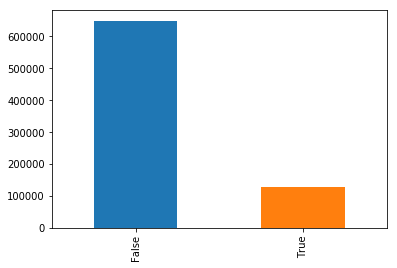

In [18]:
(result['Experience'] > 0).value_counts().plot(kind='bar')
# Experience > 0 merupakan orang yg tidak bekerja (True)

In [19]:
result

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,Age,Experience,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
5,5008804,-5,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
6,5008804,-6,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
7,5008804,-7,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
8,5008804,-8,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
9,5008804,-9,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12


### Kepemilikan Mobil

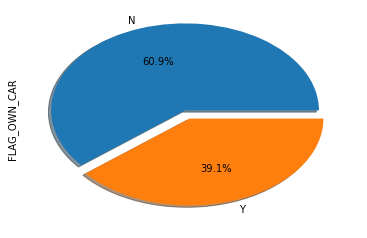

In [20]:
result['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
# 60.9% orang tidak memiliki mobil dan 39.1% memiliki mobil

### Kepemilikan properti

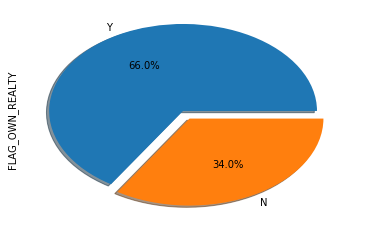

In [29]:
result['FLAG_OWN_REALTY'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
#66% Orang memiliki properti dan 34% tidak memiliki properti

### Gender

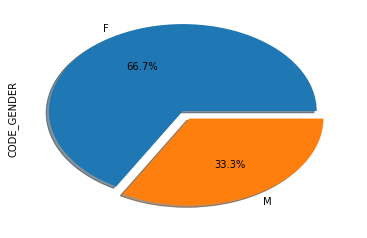

In [22]:
result['CODE_GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
# Female lebih banyak dengan 66.7%

### Tingkat pendidikan berdasarkan gender

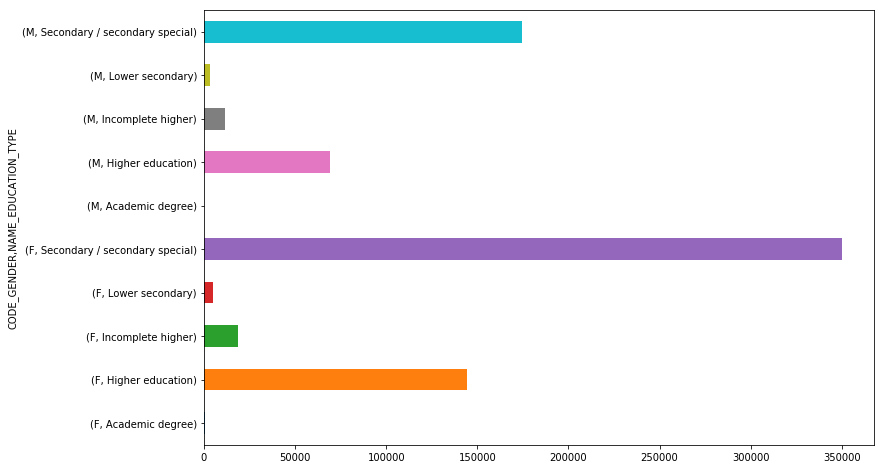

In [23]:
result.groupby(['CODE_GENDER', 'NAME_EDUCATION_TYPE']).size().plot(kind='barh', figsize = (12, 8))

### Drop kolom yang kurang berguna

In [24]:
result.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,Age,Experience,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0,-12


In [25]:
result.drop('age', axis=1, inplace=True)

In [26]:
result.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,Experience,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,1,1,0,0,0,2.0


In [27]:
result.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True)

In [28]:
result.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,Experience,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,0,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,0,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,0,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,0,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.9,-12.4,0,2.0


### jumlah anak dan anggota keluarga

In [31]:
result['CNT_CHILDREN'].value_counts()
# keluarga yang tidak memiliki anak lebih banyak dari yang memiliki anak

0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

In [32]:
result['CNT_FAM_MEMBERS'].value_counts()
#memiliki 2 anggota keluarga lebih banyak 

2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

### Dominan umur pemohon

In [39]:
result['Age'].value_counts().head()

-37.8    4300
-38.7    4251
-40.8    4024
-28.6    3746
-41.5    3736
Name: Age, dtype: int64